# Сальков ЮА ПИН-31
# Индивидуальное задание №2
## Выполнить в MatLab следующие задания к задачам из БДЗ-6 по математическому анализу:

### 5. Построить поверхность и касательную к ней в указанной точке.
Найти уравнение касательной плоскости и нормали к поверхности z**2 + x**2 + 2*y**2 + 7 =0 в точке M0(1, 2, 9)

In [138]:
import numpy as np
import sympy as sp
from sympy import *
from sympy.abc import x, y, z

def surface_tangent_equation(surface_eq, point):
    # surface_eq - уравнение поверхности
    # point - точка, в которой мы хотим найти касательную
    x0, y0, z0 = point

    # Вычисляем градиент
    gradient = [sp.diff(surface_eq, var) for var in [x, y, z]]
    gradient = sp.Matrix(gradient)

    # Вычисляем значение градиента в заданной точке
    gradient_eval = gradient.subs([(x, x0), (y, y0), (z, z0)])

    # Находим уравнение касательной плоскости
    tangent_eq = sp.Function('tangent_eq')(x, y, z)
    tangent_eq = sp.expand(gradient_eval[0]*(x-x0) + gradient_eval[1]*(y-y0) + gradient_eval[2]*(z-z0))
    tangent_eq = tangent_eq + surface_eq.subs([(x, x0), (y, y0), (z, z0)])*(-1)

    # Находим уравнение нормали
    normal_eq = sp.Function('normal_eq')(x, y, z)
    normal_eq = sp.expand(gradient_eval[0]*(x-x0) + gradient_eval[1]*(y-y0) + gradient_eval[2]*(z-z0))
    
    print("Уравнение поверхности: ", surface_eq)
    print("Уравнение касательной плоскости: ", tangent_eq)
    print("Уравнение нормали: ", normal_eq)

    surface_eq = solve(surface_eq, z)[0]
    tangent_eq = solve(tangent_eq, z)[0]
    normal_eq = solve(normal_eq, z)[0]
    
    
    pl1 = plot3d(surface_eq, (x, -1000, 1000), (y, -1000, 1000), show=False)
    pl2 = plot3d(normal_eq, (x, -1000, 1000), (y, -1000, 1000), show=False)
    pl3 = plot3d(tangent_eq, (x, -1000, 1000), (y, -1000, 1000), show=False)
    
    pl1.extend(pl2)
    pl1.extend(pl3)
    pl1.show()

Уравнение поверхности:  x**2 + 2*y**2 + z**2 + 7
Уравнение касательной плоскости:  2*x + 8*y + 18*z - 277
Уравнение нормали:  2*x + 8*y + 18*z - 180


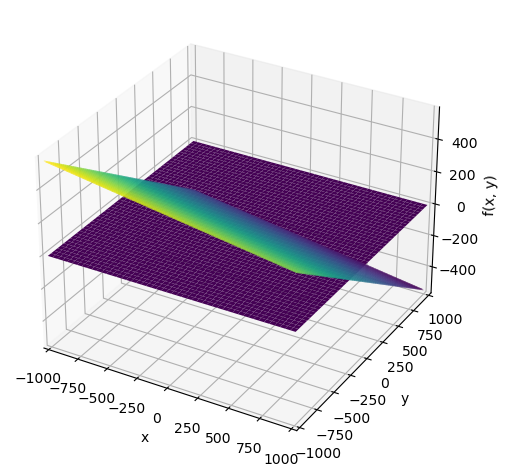

In [139]:
surface_eq = z**2 + x**2 + 2*y**2 + 7
point = (1, 2, 9)

surface_tangent_equation(surface_eq, point)


### 6. Найти точки экстремума, построить поверхность и линии уровня, отметить точки экстремума и критические.
Найти экстремумы функции u = 4*x - 3*y - x**4 + y**3

Критические точки:  [(1, -1), (1, 1), (-1/2 - sqrt(3)*I/2, -1), (-1/2 - sqrt(3)*I/2, 1), (-1/2 + sqrt(3)*I/2, -1), (-1/2 + sqrt(3)*I/2, 1)]
Точки экстремума:  [(1, -1)]


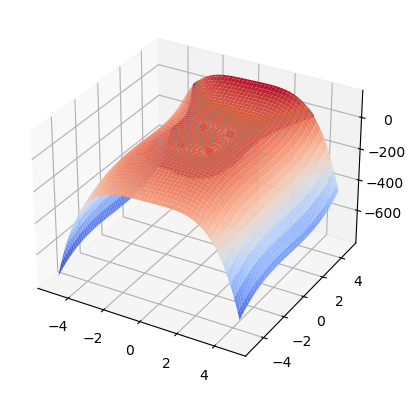

In [140]:
import numpy as np
import sympy as sp
from sympy import *
from sympy.abc import x, y
import matplotlib.pyplot as plt

def plot_surface_contour(surface_eq, critical_points, extremas):    
    x_range = np.arange(-5, 5, 0.1)
    y_range = np.arange(-5, 5, 0.1)
    X, Y = np.meshgrid(x_range, y_range)
    Z = surface_eq(X,Y)

    # Строим поверхность
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='coolwarm')

    # Строим линии уровня
    levels = np.arange(-20, 20, 1)
    plt.contour(X, Y, Z, levels)

    # Отмечаем критические точки
    for point in critical_points:
        ax.scatter(point[0].as_real_imag()[0], point[1].as_real_imag()[0], surface_eq(point[0], point[1]).as_real_imag()[0], color='black', marker='o')

    # Отмечаем точки экстремума
    for point in extremas:
        ax.scatter(point[0], point[1], surface_eq(point[0], point[1]).as_real_imag()[0], color='red', marker='o')

    plt.show()

def extrema_critical_points(surface_eq):
    gradient = [sp.diff(surface_eq, var) for var in [x, y]]
    hessian = [[sp.diff(surface_eq, var_i, var_j) for var_j in [x, y]] for var_i in [x, y]]

    # Находим критические точки
    critical_points = sp.solve(gradient, [x, y])
    print("Критические точки: ", critical_points)

    # Находим точки экстремума
    extremas = []
    for point in critical_points:
        hessian_eval = sp.Matrix(hessian).subs([(x, point[0]), (y, point[1])])
        if hessian_eval.det().as_real_imag()[0] > 0 and hessian_eval[0, 0].as_real_imag()[0] < 0:
            extremas.append(point)
    print("Точки экстремума: ", extremas)

    return critical_points, extremas


def f(a,b):
    return 4*a - 3*b - a**4 + b**3

x, y = sp.symbols('x y')
surface_eq = 4*x - 3*y - x**4 + y**3
critical_points, extremas = extrema_critical_points(surface_eq)

plot_surface_contour(f, critical_points, extremas)

### 7. Найти точки экстремума, построить поверхность и линии уровня, отметить точки экстремума и критические.
Исследовать на экстремум функцию двух переменных F(x, y) = x**3 + 6*(x**2)*y + 9*x*(y**2) * 8*y**3 +2*x**2 + 12*x*y + 24*y**2

Критические точки:  [(0, 0)]
Точки экстремума:  []


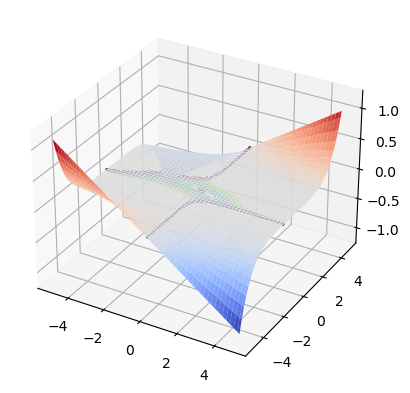

In [141]:
def f(a,b):
    return a**3 + 6*(b**2)*b + 9*a*(b**2) * 8*b**3 +2*a**2 + 12*a*b + 24*b**2

x, y = sp.symbols('x y')
surface_eq = x**3 + 6*(x**2)*y + 9*x*(y**2) * 8*y**3 +2*x**2 + 12*x*y + 24*y**2
critical_points, extremas = extrema_critical_points(surface_eq)

plot_surface_contour(f, critical_points, extremas)

### 8. Проиллюстрировать результат решения – построить поверхность, задаваемую функцией, провести на ней пресечения с поверхностью, задаваемой уравнением связи. Провести пересечение с плоскостями, параллельными координатным
Исследовать функцию z = a*cos(x)**2 + b*cos(y)**2 на условный экстремум при х + y = pi/4 и при условии неотрицательности аргументов (найти точки стационарности).



In [24]:
import numpy as np
import sympy as sp
from sympy import *
from sympy.plotting import plot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_surface_intersection(surface_eq, constraint_eq):
    # surface_eq - уравнение поверхности
    # constraint_eq - уравнение связи

    # Строим поверхность
    plot3d(surface_eq, (x, -5, 5), (y, -5, 5))

    # Находим точки пересечения поверхности и уравнения связи
    intersection_points = sp.solve([surface_eq, constraint_eq], [x, y, z])
    print("Точки пересечения поверхности и уравнения связи: ", intersection_points)

    # Строим точки пересечения поверхности и уравнения связи
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for point in intersection_points:
        ax.scatter(point[0], point[1], point[2], color='black', marker='o')

    # Строим пересечение поверхности с плоскостями, параллельными координатным
    for i in range(-5, 5):
        plane_eq = z - i
        intersection_curve = sp.solve([surface_eq, plane_eq], [x, y])
        if intersection_curve:
            x_vals = np.array([intersection_curve[0][0], intersection_curve[1][0]])
            y_vals = np.array([intersection_curve[0][1], intersection_curve[1][1]])
            z_vals = np.array([i, i])
            ax.plot(x_vals, y_vals, z_vals, color='blue')
            

    plt.show()

In [26]:
from sympy import symbols, cos, diff, solve

def extremum_search(func, condition):
    
    # Вычисляем градиент функции
    gradient = [diff(func, x), diff(func, y)]
    
    # Решаем систему уравнений для нахождения стационарных точек
    stationary_points = solve(gradient, [x, y])
    
    # Отбираем стационарные точки, удовлетворяющие условию
    feasible_points = []
    for point in stationary_points:
        if condition.subs({x: point[0], y: point[1]}):
            feasible_points.append(point)
    
    # Находим значения функции в найденных точках
    extremum_values = []
    for point in feasible_points:
        extremum_values.append(func.subs({x: point[0], y: point[1]}))
    
    # Отбираем стационарные точки, удовлетворяющие условию
    stat_points = []
    for point in stationary_points:
        if point[0] > 0 and point[1] > 0:
            stat_points.append(point)
    
    # Выводим результат
    print("Точки экстремума: {}".format(feasible_points))
    print("Значения функции в данных точках: {}".format(extremum_values))
    print("Стационарные точки: {}".format(stat_points))

Точки экстремума: [(0, 0), (0, pi/2), (0, pi), (0, 3*pi/2), (pi/2, 0), (pi/2, pi/2), (pi/2, pi), (pi/2, 3*pi/2), (pi, 0), (pi, pi/2), (pi, pi), (pi, 3*pi/2), (3*pi/2, 0), (3*pi/2, pi/2), (3*pi/2, pi), (3*pi/2, 3*pi/2)]
Значения функции в данных точках: [3, 1, 3, 1, 2, 0, 2, 0, 3, 1, 3, 1, 2, 0, 2, 0]
Стационарные точки: [(pi/2, pi/2), (pi/2, pi), (pi/2, 3*pi/2), (pi, pi/2), (pi, pi), (pi, 3*pi/2), (3*pi/2, pi/2), (3*pi/2, pi), (3*pi/2, 3*pi/2)]


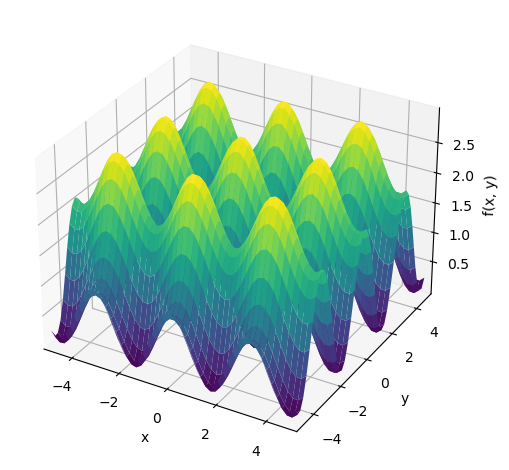

NameError: name 'z' is not defined

In [27]:
from sympy import pi

# Задаем параметры функции и условие
a = 1
b = 2
x, y = symbols('x y')
func = a*cos(x)**2 + b*cos(y)**2
condition = x + y - pi/4

# Вызываем функцию
extremum_search(func, condition)
plot_surface_intersection(func, condition)